# Hierarchical Clustering with Sklearn

This notebook shows how to train and measure a hieararchical (agglomerative) clustering model.

* Method: [Hierarchical Clustering](http://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering)
* Dataset: Stock market data

## Imports

In [1]:
from itertools import product

import pandas as pd
import numpy as np

from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

import seaborn as sb
import matplotlib.pyplot as plt
from pylab import rcParams

%matplotlib inline
rcParams['figure.figsize'] = 16, 8
sb.set_style('whitegrid')

## Load and Prepare the Data

In [2]:
DATA_FILE = "../data/sample_stocks.csv"

In [3]:
# Import the data
data = pd.read_csv(DATA_FILE)
data.head(5)

,returns,dividendyield
0,-19,0.0
1,-13,0.0
2,-14,0.0
3,-9,0.0
4,-19,0.0


In [4]:
# Check the data types
data.dtypes

returns            int64
dividendyield    float64
dtype: object

In [5]:
# Create the X and y
X = data[['dividendyield']]
y = data[['returns']]

## Identify the Number of Clusters and Linkage Type to Use

In [6]:
# Create a list of tuples to test cluster ranges with different linkages
cluster_range = range(2, 11)
linkage = ['average', 'complete', 'ward']

cluster_range_linkage = list(product(cluster_range, linkage))
print(cluster_range_linkage)

[(2, 'average'), (2, 'complete'), (2, 'ward'), (3, 'average'), (3, 'complete'), (3, 'ward'), (4, 'average'), (4, 'complete'), (4, 'ward'), (5, 'average'), (5, 'complete'), (5, 'ward'), (6, 'average'), (6, 'complete'), (6, 'ward'), (7, 'average'), (7, 'complete'), (7, 'ward'), (8, 'average'), (8, 'complete'), (8, 'ward'), (9, 'average'), (9, 'complete'), (9, 'ward'), (10, 'average'), (10, 'complete'), (10, 'ward')]


In [7]:
# Create a list of AgglomerativeClustering models with differing numbers of clusters
ag_models = [AgglomerativeClustering(n_clusters=i[0], linkage=i[1]) for i in cluster_range_linkage]
print(ag_models[0])
print(ag_models[7])

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='average', memory=None,
            n_clusters=2, pooling_func=<function mean at 0x10bcd62f0>)
AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='complete', memory=None,
            n_clusters=4, pooling_func=<function mean at 0x10bcd62f0>)


In [8]:
# For each model, fit it to the data and get the Silhouette score (described below)
cluster_scores = list()

# Fit each of the models on the features (y)
for ag_model in ag_models:
    model = ag_model.fit(y)
    s_score = metrics.silhouette_score(data, model.labels_, metric='euclidean')
    cluster_scores.append(s_score)

# Show one of the scores
cluster_scores[0]

0.6506714095424385

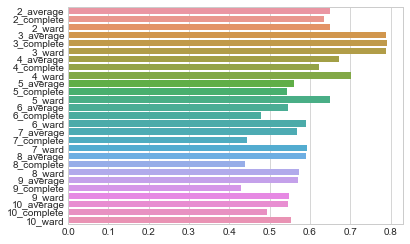

In [9]:
# Plot an barchart of the scores
chart_labels = ["{}_{}".format(i[0], i[1]) for i in cluster_range_linkage]

sb.barplot(y=chart_labels, x=cluster_scores)

**Observation**: based on the graph above it appears that 3 clusters using complete linkage has the best silhouette score.

In [10]:
# Get the index value of the max cluster score
max_score_index = cluster_scores.index(max(cluster_scores))

# Get the number of clusters used for the model with the max score
params_to_use = cluster_range_linkage[max_score_index]

print("Number of clusters: {}".format(params_to_use[0]))
print("Linkage type: {}".format(params_to_use[1]))

Number of clusters: 3
Linkage type: complete


## Fit a Hierarchical Clustering Model

Arguments:
* n_clusters: number of clusters to find
* linkage: linkage criterion; determines which distance to use between sets of observation
  * ward: minimizes the variance of the clusters being merged.
  * average: uses the average of the distances of each observation of the two sets.
  * complete: uses the maximum distances between all observations of the two sets.
* affinity: metric used to compute the linkage. Can be`euclidean`, `l1`, `l2`, `manhattan`, `cosine`, or `precomputed`. If linkage is `ward`, only `euclidean` is accepted.

In [11]:
# Fit the model
ag_model = AgglomerativeClustering(n_clusters=params_to_use[0], linkage=params_to_use[1])
model = ag_model.fit(y)

## Model Evaluation

### Silhouette Score

The mean Silhouette Coefficient of all samples.

The Silhouette Coefficient is calculated using the mean intra-cluster distance (``a``) and the mean nearest-cluster distance (``b``) for each sample.

The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

In [12]:
s_score = metrics.silhouette_score(data, model.labels_, metric='euclidean')
print("Silhouette score: %0.2f" % s_score)

Silhouette score: 0.79


### Additional Model Information

In [13]:
print("Number of leaves: {}".format(model.n_leaves_))
print("Number of components: {}".format(model.n_components_))
print("Model affinity: {}".format(model.affinity))

Number of leaves: 648
Number of components: 1
Model affinity: euclidean
